## 🌳 Decision Trees

Decision trees are one type of machine learning models that operate by deriving decision rules from the training set and using them for prediction purposes. Let $A$, $B$ and $C$ be some categorical features in the dataset and $W$ and $Z$ be some continuous features and let lowercase letters represent possible values for them. In this case, a general decision rule can takes the form:

$$(A=a) ∧ (B=b) ∧ (C=c) ∧ (W>w) ∧ (Z>z) ⟹ [y=k] $$

Each path (and hence, leave) in a decision tree corresponds to a rule like this. 

$\text{The training of the tree occurs as follow:}$

- Choose a feature (e.g., $A$ or $W$) and split it into ($A=a_1$, $A=a_2$, ..., $A=a_n$ or $W>w, W ≤ W$ )
   
    - Splitting means to add as child nodes (it's splitting in the sense that the training data will be distributed over them)

    - Multiple techniques were covered to choose the best feature

- For each of the $n$ splits (i.e., children), repeat the process with the remaining features (e.g., $B$, $C$, $W$ and $Z$)

- Stop when all instances are pure (i.e., all training points satisfying the conditions along the path from the root have the same label $y=k$) or when some other condition is met (e.g., to avoid overfitting).

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Plot import plot_model_contours

### 😎  We are Wearing our Machine Learning Engineer Spectacles Early This Time:

```python
TODO 1: Study the hyperparameters of the DecisionTreeClassifier as found in the documentation and answer the following:
```
1. Does increasing `min_samples_split` encourage a deeper or shallower tree and what effect does this have on overfitting?

In [3]:
"""
Answer goes here.
lower value of this paramter means that tree will continue to split until it reaches the minimum number of samples in the leaf node 
for example : if min_samples_split = 2 then the tree will continue to split until it reaches a leaf node with 2 samples , 
after splitting the node will contain only 1 sample then the tree will stop splitting. 
this means that the model is will be overfitted to the training data and will not generalize well to the test data.
so,
 
increasing the value will encourage shallow trees and will prevent the model from overfitting the training data.

"""

'\nAnswer goes here.\nlower value of this paramter means that tree will continue to split until it reaches the minimum number of samples in the leaf node \nfor example : if min_samples_split = 2 then the tree will continue to split until it reaches a leaf node with 2 samples , \nafter splitting the node will contain only 1 sample then the tree will stop splitting. \nthis means that the model is will be overfitted to the training data and will not generalize well to the test data.\nso,\n \nincreasing the value will encourage shallow trees and will prevent the model from overfitting the training data.\n\n'

2. Answer the same question for increasing `min_impurity_decrease` and relate it to an equation in the lecture (try to write it here).

In [4]:
"""
Answer goes here.
Higher values of `min_impurity_decrease` will result in fewer splits, simpler trees, but potentially underfitting.
Lower values will allow more splits, creating more complex trees, but potentially overfitting.

"""

'\nAnswer goes here.\nHigher values of `min_impurity_decrease` will result in fewer splits, simpler trees, but potentially underfitting.\nLower values will allow more splits, creating more complex trees, but potentially overfitting.\n\n'

<img src="./infoGain.png" width="50%"> </img>


3. Devise an example where `min_samples_split=a` and `min_samples_leaf=b` and a split on a node is prevented although it has number of samples `c` where `c>a`.

In [6]:
"""
Answer goes here. Can use https://tree.nathanfriend.io/ or draw it on paper or use a diagram tool.


This situation can occur when the number of samples c in a node is greater than min_samples_split=a,
but a split would result in a leaf node with samples less than min_samples_leaf=b.

Let's consider an example where min_samples_split=4 (a=4) and min_samples_leaf=3 (b=3).
Now, let's say we have a node with 5 samples (c=5, which is greater than a=4).
The split is possible because c>a, but if the split results in a leaf node with less than b=3 samples, 

tree is down below :

"""

"\nAnswer goes here. Can use https://tree.nathanfriend.io/ or draw it on paper or use a diagram tool.\n\n\nThis situation can occur when the number of samples c in a node is greater than min_samples_split=a,\nbut a split would result in a leaf node with samples less than min_samples_leaf=b.\n\nLet's consider an example where min_samples_split=4 (a=4) and min_samples_leaf=3 (b=3).\nNow, let's say we have a node with 5 samples (c=5, which is greater than a=4).\nThe split is possible because c>a, but if the split results in a leaf node with less than b=3 samples, \n\ntree is down below :\n\n"

```python
└── Node A(size =5 or C = 5 )/
    ├── node sub_A_1 (size = 2 ) ## impossible to occur , beacuse the min_sample_leave is 3 # so it stop
    └── node sub_A_2(size =3 )
```
    

It's important to note that the decision tree will keep training (splitting nodes) until all leaves are pure, one of the three conditions above stops any further node from splitting or `max_depth` hyperparameter is reached.

### 🐧 Load Penguins Dataset

You've done this many time in the past. So let's get over it quick:

In [3]:
# read the dataset
df = pd.read_csv('penguins.csv')                    # has many features and three classes (Penguin type)

# drop unwanted columns for the purposes of this experiment
df = df.drop(['studyName', 'Sample Number', 'Date Egg', 'Comments', 'Island', 'Stage', 'Individual ID',
              'Clutch Completion', 'Sex', 'Region'], axis=1)
df = df.drop(['Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis=1)

df['Body Mass (g)'] = df['Body Mass (g)']/1000              # rename for easier access
# drop missing values
df = df.dropna()

# save for easier access later
df.to_csv('penguins-clean.csv', index=False)
df

,Species,Culmen Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,3.750
1,Adelie Penguin (Pygoscelis adeliae),39.5,3.800
2,Adelie Penguin (Pygoscelis adeliae),40.3,3.250
4,Adelie Penguin (Pygoscelis adeliae),36.7,3.450
5,Adelie Penguin (Pygoscelis adeliae),39.3,3.650
...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,4.925
340,Gentoo penguin (Pygoscelis papua),46.8,4.850
341,Gentoo penguin (Pygoscelis papua),50.4,5.750
342,Gentoo penguin (Pygoscelis papua),45.2,5.200


Extract `x_data` and `y_data`

In [10]:
x_data_pd, y_data_pd = df.drop(columns=['Species']), df['Species']          
x_data, y_data = x_data_pd.to_numpy(), y_data_pd.to_numpy()
y_data = LabelEncoder().fit_transform(y_data)                               # convert labels to integers


### 👀 Decision Trees in Action

Let's start by studying the performance of the decision tree on the Penguins dataset.

In [11]:
# TODO 2: Define a decision tree classifier with max_depth=3 and random_state=42
clf = DecisionTreeClassifier(max_depth=3 , random_state=42)
# TODO 3: Study the performance with 5-fold cross-validation (return the mean accuracy)
acc = cross_val_score(clf, x_data, y_data, cv=5).mean()
round(acc, 3)   

0.909

Let's see what did the decision tree have to go through to result in this. We will use the package `dtreeviz` to visualize it (which looks better and is more informative than the visualization provided by `Scikit-learn`)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

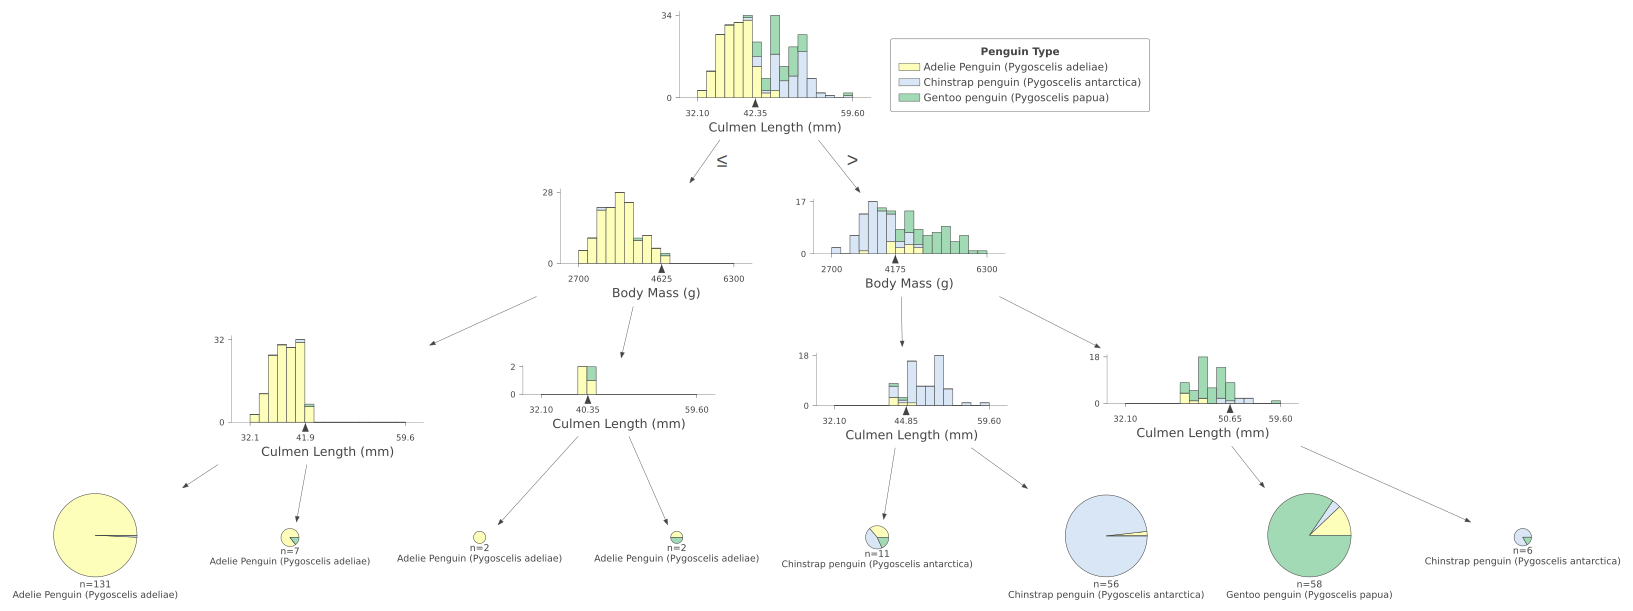

In [13]:
import dtreeviz         # install me with pip install dtreeviz

# To simulate an arbitrary fold
m = x_data.shape[0]
x_train, y_train = x_data[:int(0.8*m),:], y_data[:int(0.8*m),]
clf.fit(x_train, y_train)


plt.style.use("default")
viz = dtreeviz.model(clf, x_train, y_train, target_name='Penguin Type', feature_names=x_data_pd.columns, class_names=np.unique(y_data_pd))
viz.view(scale=1.4) 

```python
TODO 4: What do you think makes splitting at 4175 for the second node in the second level better than any other value? 
```

In [15]:
"""
Answer goes here.
I think because this is the point which mainly differentiates the gentoo and chainstrap pengiuns
so it could be has highest information Gain 

"""

'\nAnswer goes here.\nI think because this is the point which mainly differentiates the gentoo and chainstrap pengiuns\nso it could be has highest information Gain \n\n'

```python
TODO 5: How many decision rules where found by this decision tree? Which three rules are the strongest and why?
```

In [16]:
"""
Answer goes here.
8 rules; 
strongest rules  are 1 ,3, 6 because i think the have lowest entropy 
"""

'\nAnswer goes here.\n8 rules; \nstrongest rules  are 1 ,3, 6 because i think the have lowest entropy \n'

Now as we have seen, the 90% accuracy is not so satisfactory. Let's dee if we can do better with hyperparameter search.

#### 🔍 Initialize Random Search

In [19]:
# TODO 6: Define a DecisionTree classifier with random_state=42
clf = DecisionTreeClassifier(random_state=42)

# TODO 7: Define the hyperparameter search distribution
param_dist = {
    'min_samples_split': [i for i in range(2 , 51)],                      # 2 to 50
    'min_samples_leaf': [i for i in range(1 ,21 )],                       # 1 to 20
    'max_depth': [i for i in range(5 ,50 ,5 )],                              # 5 to 50 with step of 5
    'min_impurity_decrease': np.linspace(0, 0.9, 20)                   # Decide a reasonable range here (with 20 values)
}

# TODO 8: Initialize the Random Search object with 200 iterations, 5-fold cross-validation and random_state=42
clf_searched = RandomizedSearchCV(clf , param_dist, n_iter = 200, cv = 5 , random_state = 42) 


#### 🔍 Perform the Search

In [20]:
# fit the wrapped model (i.e., search and set the best hyperparameters)
clf_searched.fit(x_data, y_data)

### let's look at the top scores and the used hyperparameters:
relevant_columns = ['param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_min_impurity_decrease', 
                    'mean_test_score', 'std_test_score', 'rank_test_score']
cv_results_df = pd.DataFrame(clf_searched.cv_results_)[relevant_columns].round(decimals=3).sort_values(by='rank_test_score')
# above we filtered the clf_searched.cv_results_ as it has other irrelevant columns then rounded all values in it and sorted by score

cv_results_df.head(10)

,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_min_impurity_decrease,mean_test_score,std_test_score,rank_test_score
140,2,6,35,0.0,0.918,0.023,1
147,49,15,5,0.094737,0.915,0.030,2
169,33,11,35,0.047368,0.915,0.030,2
82,44,10,40,0.094737,0.915,0.030,2
75,23,15,10,0.142105,0.915,0.030,2
30,5,17,5,0.094737,0.915,0.030,2
73,38,1,5,0.047368,0.915,0.030,2
71,23,5,15,0.047368,0.915,0.030,2
68,27,7,30,0.047368,0.915,0.030,2
36,33,16,35,0.047368,0.915,0.030,2


As we can see, the best score is not that good. Let's plot to understand more:

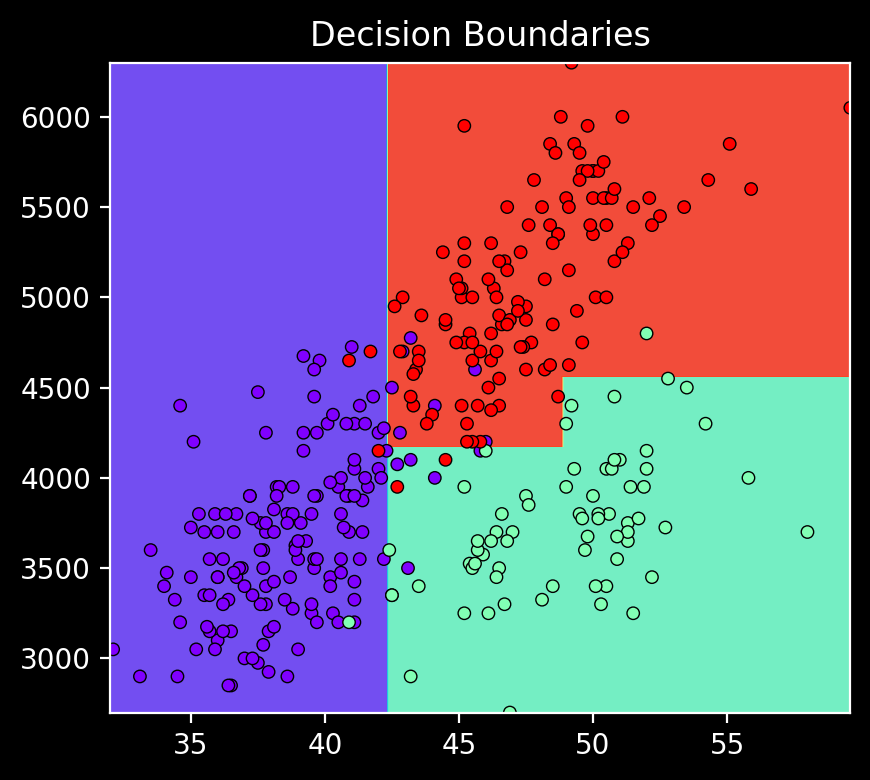

In [21]:
plot_model_contours(clf_searched,  x_data, y_data, trained=True)

```python
TODO 9: Given the plot, comment on what disadvantage of decision trees, as covered in the lecture, is most likely the reason for the mediocre performance. Comparing the boundary to the ideal decision boundary shall be helpful in this.
```

In [22]:
'''
Answer goes here.

Decision trees create boundaries parallel to the axes, 
which can limit their ability to accurately capture the true decision boundary if it is diagonal or non-axis-aligned.

'''

'\nAnswer goes here.\n\nDecision trees create boundaries parallel to the axes, \nwhich can limit their ability to accurately capture the true decision boundary if it is diagonal or non-axis-aligned.\n\n'

### 🌀 Decision Trees and Overfitting:

Hyperparameters: 100%|██████████| 8/8 [00:16<00:00,  2.09s/it]


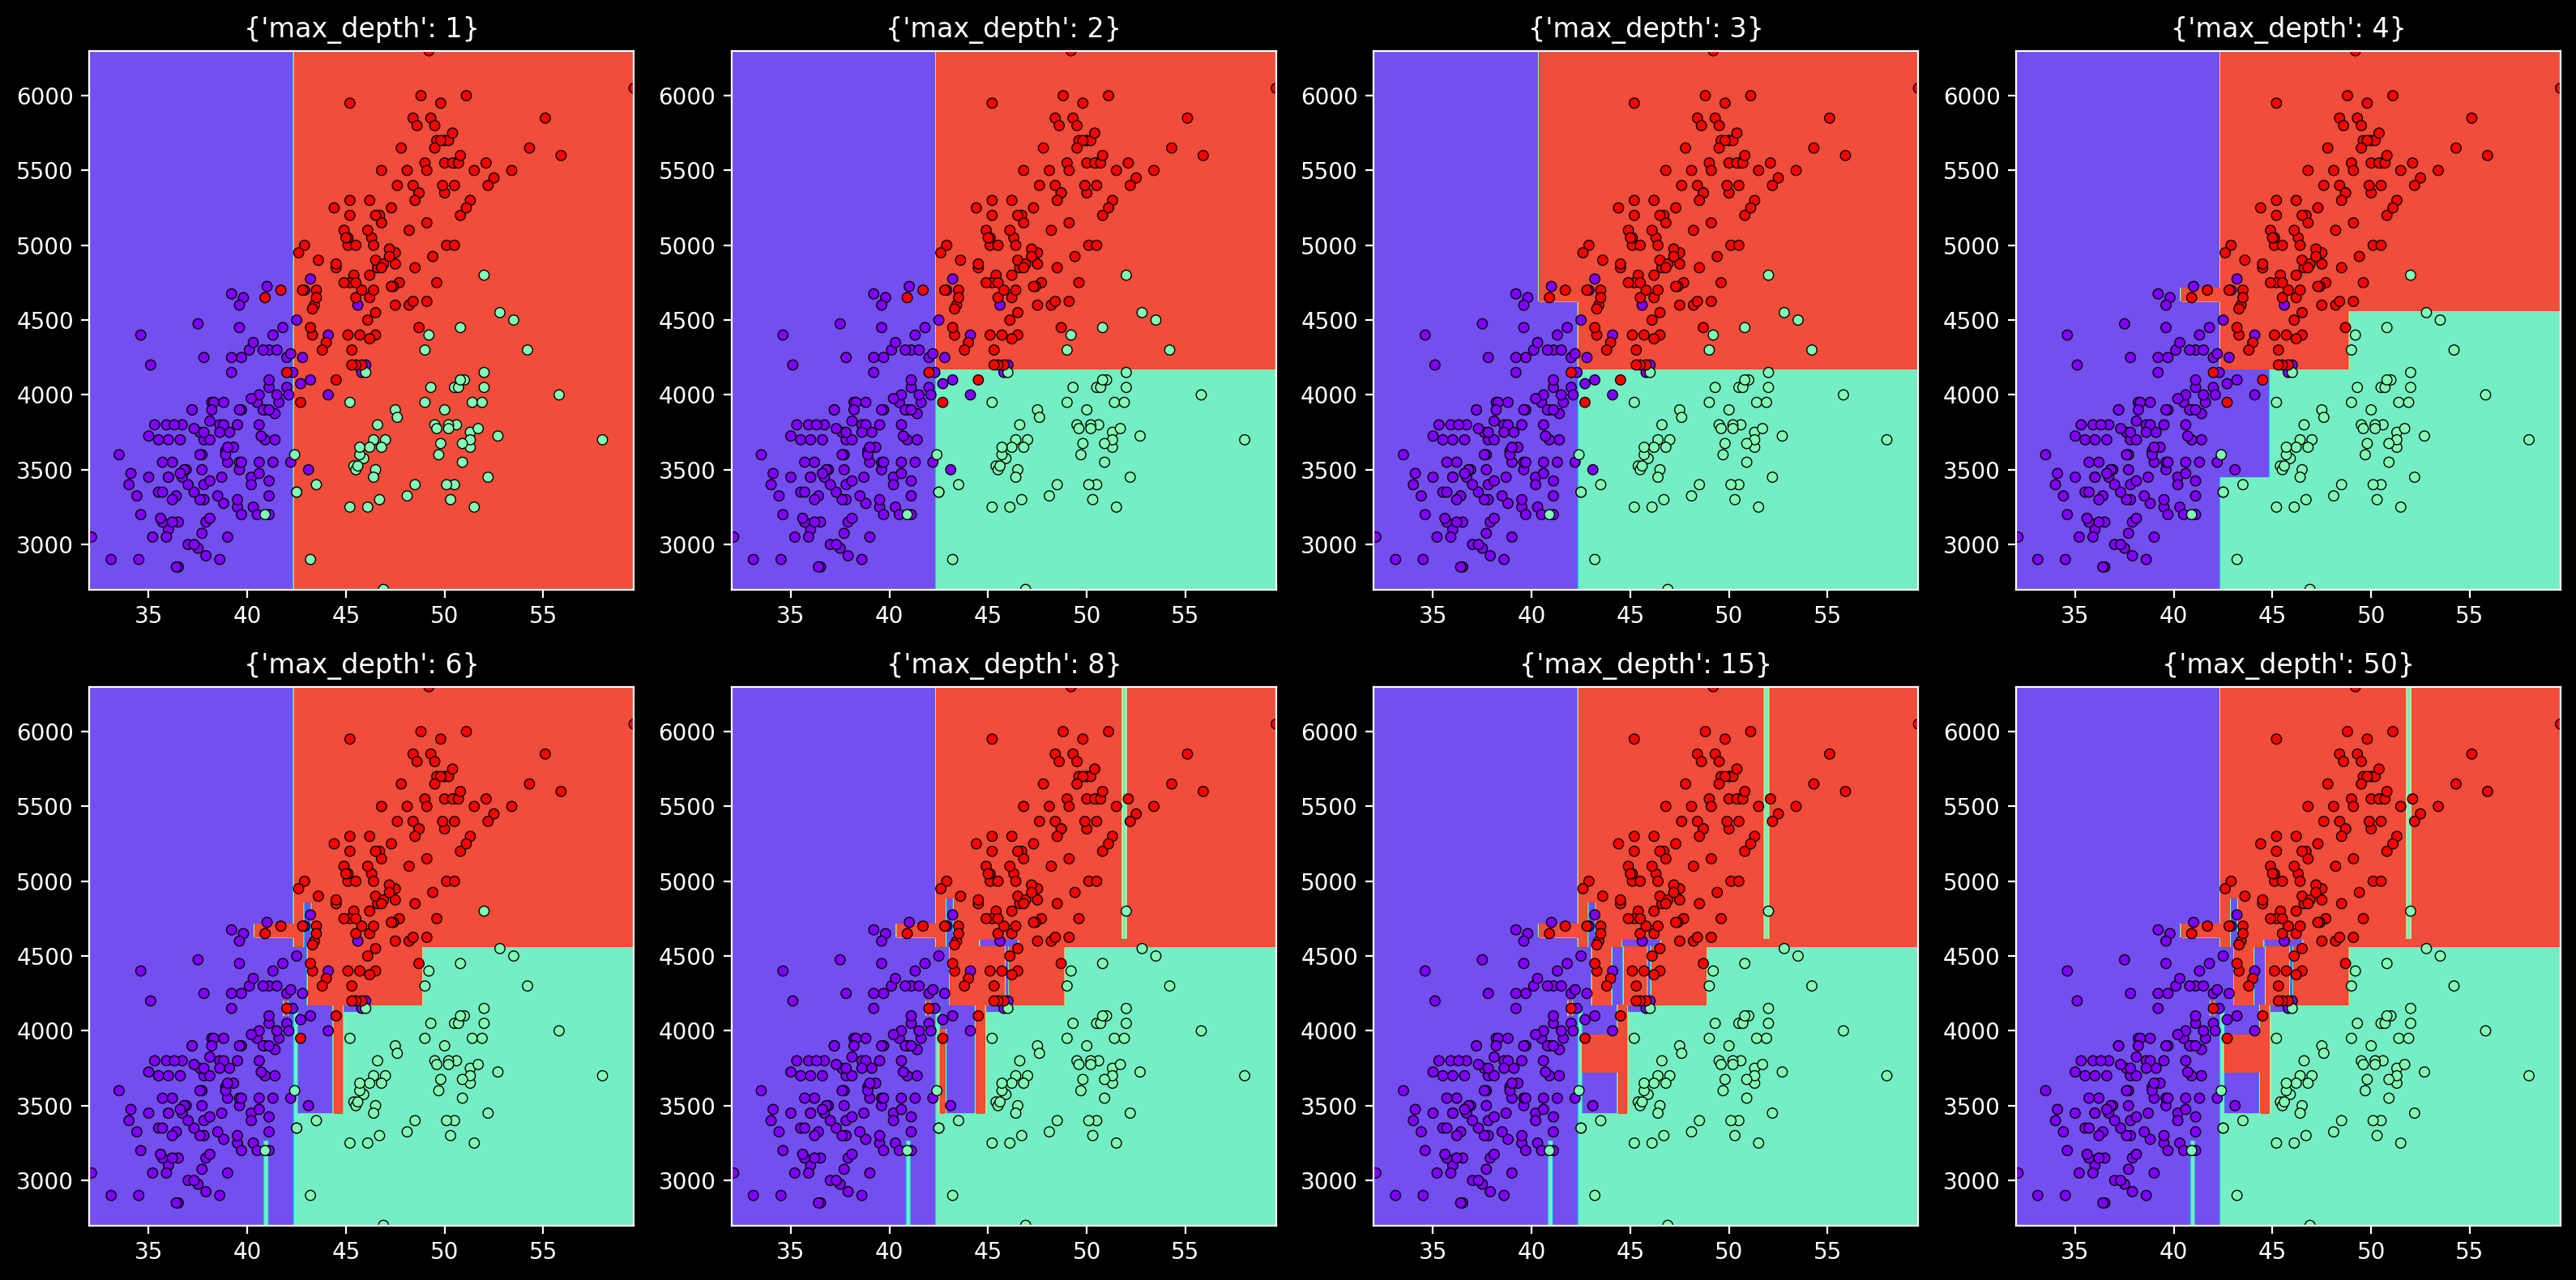

In [23]:
# Define the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# TODO 10: Use depth [1, 2, 3, 4, 6, 8, 15, 50]
hyperparams_list = [
    {'max_depth': 1},
    {'max_depth': 2},
    {'max_depth': 3},
    {'max_depth': 4},
    {'max_depth': 6},
    {'max_depth': 8},
    {'max_depth': 15},
    {'max_depth': 50}
]

# Plot decision boundaries. 
plot_model_contours(dt_model, x_data, y_data, hyperparams_list=hyperparams_list)

```python
TODO 11: Given this, how does depth affect overfitting? Which depth seems the most optimal from the selection above?
```

In [24]:
'''
Answer goes here.
more depth , more complex decision boundary , more overfitting
i think 3 , or 4 is the best depth for this model
'''

'\nAnswer goes here.\nmore depth , more complex decision boundary , more overfitting\ni think 3 , or 4 is the best depth for this model\n'

####  🌀 Confirmatory Analysis for Overfitting

Hyperparameters: 100%|██████████| 8/8 [00:00<00:00, 123.61it/s]


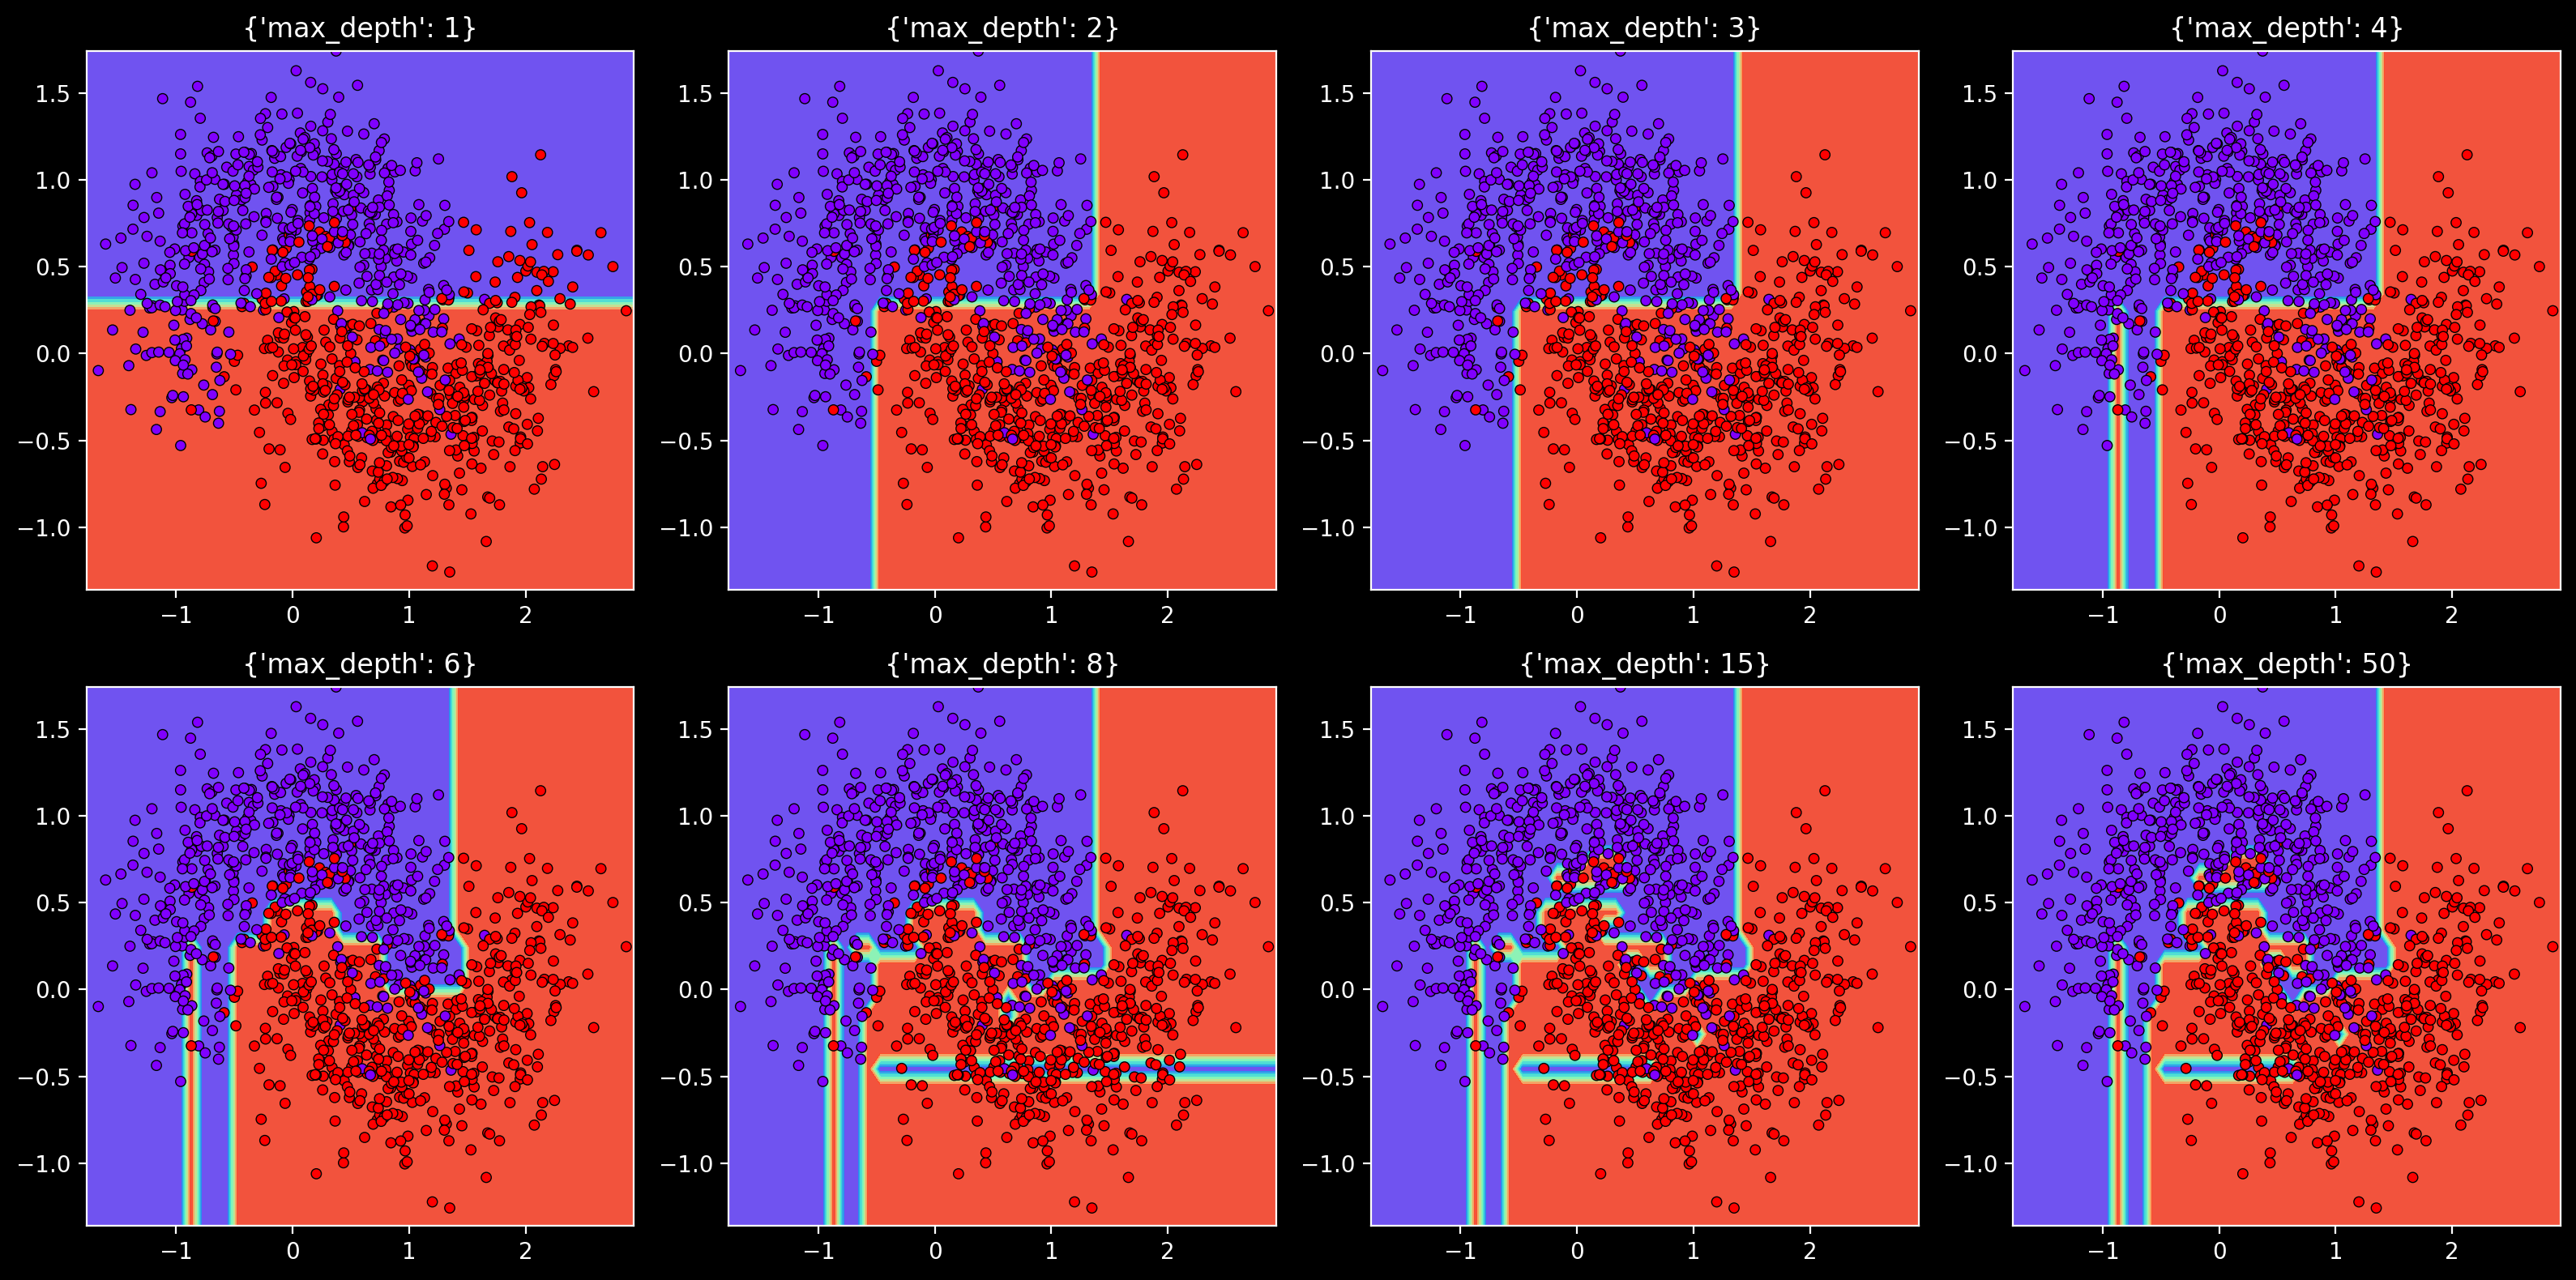

In [25]:
from sklearn.datasets import make_moons

# TODO 12: Call make_moons with n_samples=1000, noise=0.3 and random_state=42
x_data_m, y_data_m = make_moons(n_samples=1000, noise=0.3, random_state=42)
plot_model_contours(DecisionTreeClassifier(), x_data_m, y_data_m, hyperparams_list=hyperparams_list)

<div align="center">
    <img src="https://i.imgur.com/LMiA2O5.gif" width=800/>
</div>

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a BaggingClassifier
clf = BaggingClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Use predict_proba to get class probabilities
probabilities = clf.predict_proba(X_test)

X_test.shape
# probabilities.shape



(20, 4)